### This script contains the following:

#### 1. Importing libraries and data cleaning
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # standardizing 

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# seting up folder path

path = '/Users/martamajer/Desktop/Desktop - Marta’s MacBook Air - 1/10-2024 Mental Health Database/'

# importing datasets

mental_illness_prevalence_burden_daly = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'mental_illness_prevalence_burden_daly.csv'), index_col = False)
anxiety_disorders_treatment_gap = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '05_anxiety_disorders_treatment_gap.csv'), index_col = False)
depressive_symptoms_across_us_population = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '06_depressive_symptoms_across_us_population.csv'), index_col = False)
adult_population_covered_in_primary_data_on_the_prevalence_of_mental_illnesses = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '04_adult_population_covered_in_primary_data_on_the_prevalence_of_mental_illnesses.csv'), index_col = False)

In [5]:
mental_illness_prevalence_burden_daly.shape

(6150, 14)

In [6]:
# dropping the column that is unneccesary 

mental_illness_prevalence_burden_daly.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
mental_illness_prevalence_burden_daly.head()

,Country(Entity),Year,Code,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
0,Afghanistan,1990,AFG,0.223206,4.996118,4.713314,0.703023,0.127700,138.24825,895.22565,440.33000,147.64412,26.471115
1,Afghanistan,1991,AFG,0.222454,4.989290,4.702100,0.702069,0.123256,137.76122,893.88434,439.47202,147.56696,25.548681
2,Afghanistan,1992,AFG,0.221751,4.981346,4.683743,0.700792,0.118844,137.08030,892.34973,437.60718,147.13086,24.637949
3,Afghanistan,1993,AFG,0.220987,4.976958,4.673549,0.700087,0.115089,136.48602,891.51587,436.69104,146.78812,23.863169
4,Afghanistan,1994,AFG,0.220183,4.977782,4.670810,0.699898,0.111815,136.18323,891.39160,436.76800,146.58481,23.189074


In [8]:
df = mental_illness_prevalence_burden_daly

In [9]:
df.head()

,Country(Entity),Year,Code,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
0,Afghanistan,1990,AFG,0.223206,4.996118,4.713314,0.703023,0.127700,138.24825,895.22565,440.33000,147.64412,26.471115
1,Afghanistan,1991,AFG,0.222454,4.989290,4.702100,0.702069,0.123256,137.76122,893.88434,439.47202,147.56696,25.548681
2,Afghanistan,1992,AFG,0.221751,4.981346,4.683743,0.700792,0.118844,137.08030,892.34973,437.60718,147.13086,24.637949
3,Afghanistan,1993,AFG,0.220987,4.976958,4.673549,0.700087,0.115089,136.48602,891.51587,436.69104,146.78812,23.863169
4,Afghanistan,1994,AFG,0.220183,4.977782,4.670810,0.699898,0.111815,136.18323,891.39160,436.76800,146.58481,23.189074


In [10]:
df.describe()

,Year,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945,170.168725,650.147720,391.391882,137.602358,41.622553
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051,25.574189,189.881727,101.513141,50.977136,29.615846
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780,119.913380,243.097840,180.049640,39.438133,9.671199
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748,154.312173,500.949597,326.350750,112.243175,20.541226
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325,174.697920,630.373350,375.719120,123.508730,30.762172
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860,183.565115,764.889150,433.911575,184.623580,51.641518
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688,291.100100,1427.423600,814.302300,325.152800,218.704390


In [11]:
# Filter for the year 2019
df = df[df['Year'] == 2019]

# List of columns to keep
columns_to_keep = [
    "Rate: Schizophrenia", "Rate: Depressive disorders", "Rate: Anxiety disorders",
    "Rate: Bipolar disorders", "Rate: Eating disorders", 
    "DALYs: Schizophrenia", "DALYs: Depressive disorders", 
    "DALYs: Anxiety disorders", "DALYs: Bipolar disorder", "DALYs: Eating disorders"
]

# Select only these columns in the filtered DataFrame
df = df[columns_to_keep]

In [12]:
df

,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
29,0.217777,4.945168,4.851035,0.699645,0.117414,135.63637,890.18880,457.24570,148.224640,24.711750
59,0.287501,2.460203,3.837537,0.542009,0.136648,185.53891,386.41925,368.11500,117.631195,29.221224
89,0.249135,4.129681,4.771976,0.756275,0.210603,160.01306,736.51490,458.80023,163.719420,44.839720
119,0.303400,2.659042,4.044245,0.279732,0.128156,192.81041,393.94205,384.18695,59.720222,27.355640
149,0.286518,3.607207,5.453410,0.934813,0.520892,183.04898,626.02860,522.78680,201.294050,111.030820
...,...,...,...,...,...,...,...,...,...,...
6029,0.323551,2.473061,2.287339,0.336103,0.094745,210.68578,360.23220,220.24388,73.046140,20.586077
6059,0.287409,3.440053,3.779522,0.489817,0.173952,184.14943,577.74695,360.12097,105.430250,37.189297
6089,0.225680,4.895368,4.783716,0.725980,0.123512,143.32640,890.98820,455.44073,155.442700,26.062387
6119,0.212869,4.219490,3.969207,0.574454,0.114669,134.65456,708.93510,375.89227,122.788340,24.392563


### standardizing data 

In [13]:
#scaler = StandardScaler()
# df = scaler.fit_transform(df)

In [14]:
# df.head()

### 2. The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-9680632.888939053,
 -5094408.7293873355,
 -3672978.1913958807,
 -2783068.899257576,
 -2298323.3630076237,
 -2002360.7056228777,
 -1865839.0754073355,
 -1735068.1294893413,
 -1366794.7329815736]

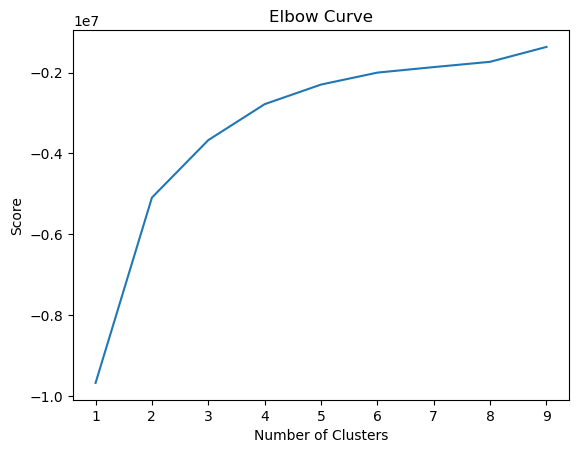

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

In [21]:
df.head()

,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders,clusters
29,0.217777,4.945168,4.851035,0.699645,0.117414,135.63637,890.18880,457.24570,148.224640,24.711750,1
59,0.287501,2.460203,3.837537,0.542009,0.136648,185.53891,386.41925,368.11500,117.631195,29.221224,0
89,0.249135,4.129681,4.771976,0.756275,0.210603,160.01306,736.51490,458.80023,163.719420,44.839720,2
119,0.303400,2.659042,4.044245,0.279732,0.128156,192.81041,393.94205,384.18695,59.720222,27.355640,0
149,0.286518,3.607207,5.453410,0.934813,0.520892,183.04898,626.02860,522.78680,201.294050,111.030820,2


In [22]:
df['clusters'].value_counts()

clusters
2    76
0    73
1    56
Name: count, dtype: int64

#### chosing to compare bipolar and depression as those are usually misdiagnosed.

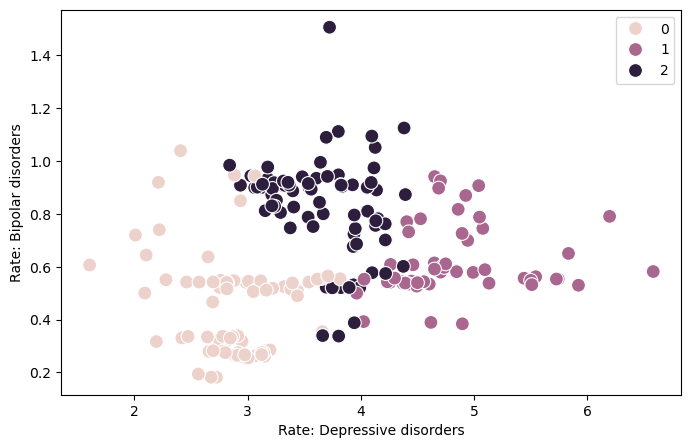

In [23]:
# Plot the clusters for the "Rate: Depressive disorders" and "Rate: Bipolar disorders" variables.

plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=df['Rate: Depressive disorders'], y=df['Rate: Bipolar disorders'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rate: Depressive disorders') # Label x-axis.
plt.ylabel('Rate: Bipolar disorders') # Label y-axis.
plt.show()

#### you can do more graphs for exploration 

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
# Group by 'cluster' and aggregate the specified columns
result = df.groupby('cluster').agg({
    'Rate: Schizophrenia': ['mean', 'median'],
    'Rate: Depressive disorders': ['mean', 'median'],
    'Rate: Anxiety disorders': ['mean', 'median'],
    'Rate: Bipolar disorders': ['mean', 'median'],
    'Rate: Eating disorders': ['mean', 'median'],
    'DALYs: Schizophrenia': ['mean', 'median'],
    'DALYs: Depressive disorders': ['mean', 'median'],
    'DALYs: Anxiety disorders': ['mean', 'median'],
    'DALYs: Bipolar disorder': ['mean', 'median'],
    'DALYs: Eating disorders': ['mean', 'median']
})

In [26]:
result

Rate: Schizophrenia           Rate: Depressive disorders  \
                           mean    median                       mean   
cluster                                                                
dark purple            0.281046  0.277484                   3.664869   
pink                   0.282809  0.287409                   2.882256   
purple                 0.229952  0.217411                   4.844682   

                      Rate: Anxiety disorders            \
               median                    mean    median   
cluster                                                   
dark purple  3.694110                4.876265  4.534016   
pink         2.882806                3.553926  3.612120   
purple       4.714158                3.958176  3.697819   

            Rate: Bipolar disorders           Rate: Eating disorders  \
                               mean    median                   mean   
cluster                                                                
dark purple                0.830298  0.891888               0.319083   
pink                       0.457264  0.505899               0.152673   
purple                     0.616094  0.578287               0.148661   

                      DALYs: Schizophrenia              \
               median                 mean      median   
cluster                                                  
dark purple  0.280355           179.628979  177.596440   
pink         0.129276           181.832891  184.149430   
purple       0.113660           146.380570  138.900695   

            DALYs: Depressive disorders            DALYs: Anxiety disorders  \
                                   mean     median                     mean   
cluster                                                                       
dark purple                  643.145695  647.65161               466.382767   
pink                         462.794084  457.47960               339.892902   
purple                       861.110682  831.77097               377.157401   

                        DALYs: Bipolar disorder              \
                 median                    mean      median   
cluster                                                       
dark purple  435.502615              179.199510  192.086435   
pink         348.510560               98.885941  109.631100   
purple       352.730120              132.398227  123.581493   

            DALYs: Eating disorders             
                               mean     median  
cluster                                         
dark purple               68.048739  59.853959  
pink                      32.827298  27.497412  
purple                    31.632766  24.312658

In [27]:
# Get the country information back
df_with_countries = mental_illness_prevalence_burden_daly[mental_illness_prevalence_burden_daly['Year'] == 2019]
df_with_clusters = df.copy()
df_with_clusters['Country'] = df_with_countries['Country(Entity)'].values

# View countries in each cluster
print("Countries in each cluster:")
for cluster_name in ['dark purple', 'purple', 'pink']:
    countries = df_with_clusters[df_with_clusters['cluster'] == cluster_name]['Country'].tolist()
    print(f"\n{cluster_name.upper()} cluster ({len(countries)} countries):")
    print(', '.join(sorted(countries)))

# For a more organized tabular view:
print("\nTabular view of countries and their clusters:")
country_clusters = df_with_clusters[['Country', 'cluster']].sort_values(['cluster', 'Country'])
print(country_clusters.to_string())

Countries in each cluster:

DARK PURPLE cluster (76 countries):
Algeria, Andorra, Antigua and Barbuda, Australia, Austria, Bahamas, Barbados, Belarus, Belgium, Belize, Bermuda, Bolivia, Brazil, Canada, Chile, Costa Rica, Cote d'Ivoire, Cuba, Cyprus, Denmark, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Finland, France, Germany, Grenada, Guatemala, Haiti, Honduras, Iceland, Iraq, Ireland, Israel, Italy, Jordan, Kuwait, Latvia, Lithuania, Luxembourg, Malawi, Malaysia, Malta, Mauritius, Mexico, Monaco, Netherlands, New Zealand, Nicaragua, Norway, Oman, Pakistan, Paraguay, Portugal, Qatar, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, San Marino, Saudi Arabia, Sweden, Switzerland, Syria, Trinidad and Tobago, Turkey, Ukraine, United Arab Emirates, United Kingdom, United States, United States Virgin Islands, Uruguay, Venezuela, Zambia

PURPLE cluster (56 countries):
Afghanistan, Angola, Bahrain, Bangladesh, Benin, Bhutan, Botswana, Burkina Faso,

## INSIGHTS:

### TL;DR:

- There's significant regional variation in mental health burden
- Conditions tend to cluster together - regions with high rates of one condition often have high rates of others
- The disease burden (DALYs) generally aligns with prevalence rates
- The dark purple cluster shows particular vulnerability to depression
- The pink cluster shows the highest overall burden across multiple conditions

**1. DARK PURPLE cluster (53 countries):**

Most African countries (e.g., Angola, Botswana, Burkina Faso, Ethiopia)
Some Middle Eastern countries (Afghanistan, Bahrain, Iran, Yemen)
Few Southern European countries (Greece, Spain)
Some Asian countries (Bangladesh, Mongolia, Nepal)
Few South American countries (Guyana, Suriname)

Highest rates of depressive disorders (mean: 4.88)
Lowest rates of schizophrenia (mean: 0.23)
Mid-range anxiety rates (mean: 3.97)
Moderate bipolar disorder rates (mean: 0.62)
Lowest eating disorder rates (mean: 0.15)
Highest DALYs (Disability-Adjusted Life Years) for depressive disorders (mean: 868.88)
Mid-range DALYs for anxiety disorders (mean: 377.81)

**2. PURPLE cluster (72 countries):**

Many Asian countries (China, Japan, Indonesia, Vietnam, Cambodia)
Most Eastern European countries (Albania, Croatia, Hungary, Poland)
Pacific Island nations (Fiji, Samoa, Solomon Islands)
Some South American countries (Argentina, Colombia, Peru)

Highest rates of schizophrenia (mean: 0.28)
Lowest rates of depressive disorders (mean: 2.87)
Lowest rates of anxiety disorders (mean: 3.56)
Lowest rates of bipolar disorders (mean: 0.46)
Lowest DALYs for depressive disorders (mean: 460.34)
Lowest DALYs for anxiety disorders (mean: 340.64)
Lowest DALYs for bipolar disorder (mean: 98.60)

**3. PINK cluster (80 countries):**

Most Western European countries (France, Germany, UK, Netherlands)
North American countries (USA, Canada, Mexico)
Most Oceania developed nations (Australia, New Zealand)
Most Middle Eastern wealthy nations (UAE, Kuwait, Qatar)
Some South American countries (Brazil, Chile, Uruguay)

Highest rates of anxiety disorders (mean: 4.81)
Highest rates of bipolar disorders (mean: 0.82)
Highest rates of eating disorders (mean: 0.31)
Highest DALYs for anxiety disorders (mean: 460.35)
Highest DALYs for bipolar disorder (mean: 176.35)
Highest DALYs for eating disorders (mean: 66.18)

**---> Key patterns:**

**Economic development seems to correlate with cluster membership:**

- Pink cluster contains most developed/high-income nations
- Dark purple cluster contains many developing nations
- Purple cluster is mixed but includes many middle-income countries


**Geographic patterns:**

- Western Europe is predominantly in the pink cluster
- Eastern Europe is predominantly in the purple cluster
- Africa is predominantly in the dark purple cluster
- Asia is split between purple and dark purple clusters
- The Americas are split between pink and purple clusters


**Cultural/Regional patterns:**

- Most Nordic countries are in the pink cluster
- Most Pacific islands are in the purple cluster
- Most Gulf states are in the pink cluster


**DARK PURPLE cluster cluster appears to represent regions with particularly high depression burden but relatively lower rates of other mental health conditions.**

**PURPLE cluster represents regions with relatively lower mental health burden across most conditions, except for slightly higher schizophrenia rates.**

**PINK cluster seems to represent regions with more diverse mental health challenges, particularly high anxiety and bipolar disorder rates.**


#### I was interested in countries with progressive mental health treatments, such as the United States, Canada, Brazil, the Netherlands, Jamaica, Switzerland, Portugal, and Mexico.

All countries, except Jamaica, belong to the pink cluster, which is characterized by:

- Higher rates of anxiety disorders
- Higher rates of bipolar disorders
- Higher rates of eating disorders
- The highest DALYs (disease burden) for anxiety, bipolar, and eating disorders

Jamaica, on the other hand, is part of the purple cluster, characterized by:

- Relatively lower mental health burden across most conditions
- Higher rates of schizophrenia
- Lower rates of depressive disorders
- Lower rates of anxiety disorders
- Lower overall DALYs

**This suggests a substantial opportunity to offer individuals innovative treatment options. Further analysis will be conducted to examine the timeline and identify which countries have successfully reduced the prevalence of disorders over time.**

In [28]:
# exporting csv files of the dataframe with ratios and metrics
country_clusters.to_csv(os.path.join(path, '02 Data','Prepared Data', 'country_clusters.csv'))

In [29]:
country_clusters.head()

,Country,cluster
89,Algeria,dark purple
149,Andorra,dark purple
209,Antigua and Barbuda,dark purple
299,Australia,dark purple
329,Austria,dark purple


In [30]:
df_with_countries.head()

,Country(Entity),Year,Code,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
29,Afghanistan,2019,AFG,0.217777,4.945168,4.851035,0.699645,0.117414,135.63637,890.18880,457.24570,148.224640,24.711750
59,Albania,2019,ALB,0.287501,2.460203,3.837537,0.542009,0.136648,185.53891,386.41925,368.11500,117.631195,29.221224
89,Algeria,2019,DZA,0.249135,4.129681,4.771976,0.756275,0.210603,160.01306,736.51490,458.80023,163.719420,44.839720
119,American Samoa,2019,ASM,0.303400,2.659042,4.044245,0.279732,0.128156,192.81041,393.94205,384.18695,59.720222,27.355640
149,Andorra,2019,AND,0.286518,3.607207,5.453410,0.934813,0.520892,183.04898,626.02860,522.78680,201.294050,111.030820


In [34]:
# Merging the DataFrames
df_country_clusters_merged = pd.merge(df_with_countries, country_clusters, 
                     left_on='Country(Entity)', 
                     right_on='Country', 
                     how='inner')  # or 'outer', 'left', 'right' depending on your needs

# Display the merged DataFrame
print(df_country_clusters_merged)

    Country(Entity)  Year      Code  Rate: Schizophrenia  \
0       Afghanistan  2019       AFG             0.217777   
1           Albania  2019       ALB             0.287501   
2           Algeria  2019       DZA             0.249135   
3    American Samoa  2019       ASM             0.303400   
4           Andorra  2019       AND             0.286518   
..              ...   ...       ...                  ...   
200         Vietnam  2019       VNM             0.323551   
201           World  2019  OWID_WRL             0.287409   
202           Yemen  2019       YEM             0.225680   
203          Zambia  2019       ZMB             0.212869   
204        Zimbabwe  2019       ZWE             0.202482   

     Rate: Depressive disorders  Rate: Anxiety disorders  \
0                      4.945168                 4.851035   
1                      2.460203                 3.837537   
2                      4.129681                 4.771976   
3                      2.659042        

In [35]:
# exporting csv files of the dataframe with ratios and metrics
df_country_clusters_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_country_clusters_merged.csv'))